<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/%ED%95%B4%EC%84%A4/ch02_05_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.05. 히트맵

---
* 날짜:
* 이름:

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

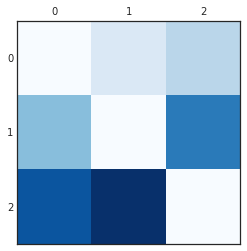

In [ ]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='Blues')
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

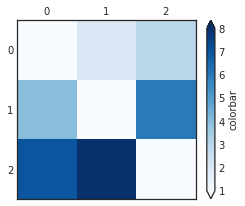

In [ ]:
plt.matshow(x, cmap='Blues')
plt.colorbar(extend='both',shrink=0.8, label='colorbar', norm=True)
plt.show()

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

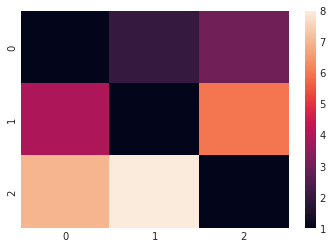

In [ ]:
sns.heatmap(x)
plt.show() 

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

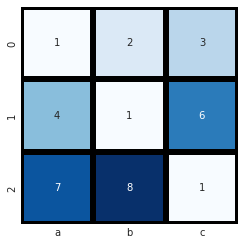

In [ ]:
ax = sns.heatmap(x, annot=True, 
                 cmap='Blues',
                 fmt='d', 
                 linecolor='black', 
                 linewidth=5, 
                 cbar=False, 
                 square=True,  
                 xticklabels=['a', 'b', 'c'])
plt.show() 

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [ ]:
df = pd.DataFrame(x)
df

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1



* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [ ]:
df.style.background_gradient()

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


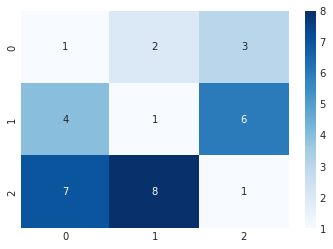

In [ ]:
sns.heatmap(data=df, cmap='Blues', annot=True)


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [ ]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))
#len(t), len(day), len(vals)

df = pd.DataFrame([day, t]).T
df.columns=['days', 'time']
df['count']=vals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   days    15 non-null     object
 1   time    15 non-null     object
 2   count   15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 488.0+ bytes


In [ ]:
df.pivot('days', 'time', 'count').style.background_gradient()

time,오전,오후,저녁
days,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

x_data = iris.data
print('x_data',x_data.shape)
y_data = iris.target
print('y_data',y_data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x_data (150, 4)
y_data (150,)


In [ ]:
df = pd.DataFrame(x_data)
df.columns=x_names
df['species']=y_data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.corr().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


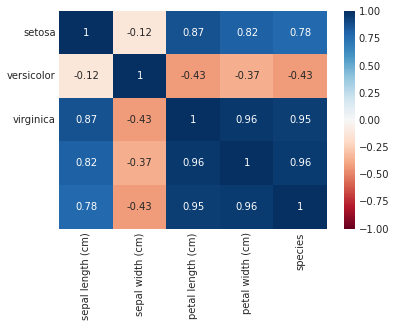

In [ ]:
sns.heatmap(df.corr(),
            cmap='RdBu',
            annot=True,
            yticklabels=y_names,
            vmin=-1, vmax=1)
plt.show()

### (3) Iris 데이터 종류별 크기 분석



In [ ]:
df.groupby('species').mean().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.588000,2.974000,5.552000,2.026000


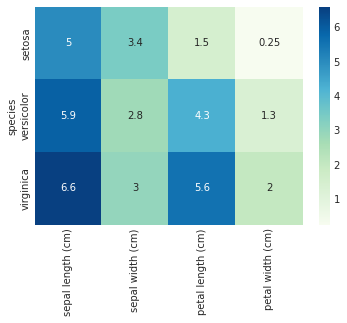

In [ ]:
sns.heatmap(df.groupby('species').mean(),
            cmap='GnBu',
            annot=True,
            yticklabels=y_names)
plt.show()


##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



In [ ]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.pivot('year','month', 'passengers').style.background_gradient()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336



### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 변수들 중 상관관계가 높은 변수 쌍을 각각 x축, y축으로 하는 산점도를 그리세요. (2개이상)
* 변수들 중 `median_house_value`와 가장 상관관계가 높은 변수를 찾고 둘을 각각 x축, y축으로 하는 산점도를 그리세요.

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


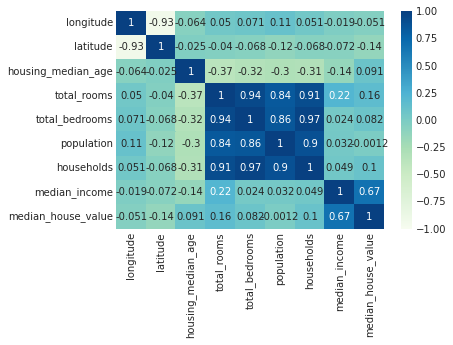

In [ ]:
sns.heatmap(df.corr(),
            cmap='GnBu',
            annot=True,
            vmin=-1, vmax=1)
plt.show()